<a href="https://colab.research.google.com/github/vn322/Cod_future/blob/main/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D0%BF%D1%80%D0%B8%D0%BD%D1%8F%D1%82%D0%B8%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Рассмотрим другой алгоритм обучения с учителем (Supervised Machine Learning)

Дерево решений использует древовидное представление для решения проблемы, в которой каждый конечный узел соответствует метке класса, а атрибуты представлены во внутреннем узле дерева. Любую логическую функцию можно представить используя дерево решений. Можно представить древовидную структуру (древовидный граф), состоящую из логических закономерностей, на основе которых решается задачи классификации, регрессии и др.
Логическая закономерность (в задачах классификации) — это  легко
интерпретируемое правило (rule), выделяющее из обучающей выборки
достаточно много объектов какого-то одного класса и мало объектов остальных
классов.
В процессе построения дерева решений эти закономерности выявляются за
счет обобщения (индукции) множества отдельных наблюдений (обучающих
примеров). Поэтому их называют индуктивными правилами (rule induction), а сам
процесс построения дерева — индукцией деревьев решений.


Деревья решений подразделяются на два типа в зависимости от целевых переменных.


**Categorical Variable Decision Trees**: здесь алгоритм имеет категориальную целевую переменную. Например, вас попросили спрогнозировать развитие статистических показателей персонажа или игрока в одной из трех категорий: низкая, средняя или высокая. Дерево решений будет пытаться уменьшить энтропию (увеличить количество полезной информации) с каждым новым выбором, и после прохождения каждой точки данных через каждый узел оно окажется в концевом узле одной из трех категориальных целей: низкий, средний или высокий.


**Continuous Variable Decision Trees**: в этом случае входные данные дерева решений (например, те же результаты выполнения упражнений) будут использоваться для прогнозирования непрерывного результата (например, результатов боёв в игре).
Деревья решений требуют очень мало времени для обработки данных по сравнению с другими алгоритмами. Некоторые этапы предварительной обработки, такие как нормализация и масштабирование данных, не обязательно производить. Пропущенные значения не так значительно влияют на производительность модели. Сама модель дерева решений интуитивно понятна и проста для объяснения практикам


Недостатки алгоритмов деревьев решений:

1.	Небольшие изменения данных могут вызвать большие изменения в структуре дерева решений, что, в свою очередь, приводит к нестабильности.
2.	Время обучения резко увеличивается пропорционально размеру набора данных. 
3.	В некоторых случаях вычисления могут оказаться сложными по сравнению с другими традиционными алгоритмами.
4. Жадный алгоритм построения дерева не гарантирует его оптимальности

Достоинства:

1. Легко интерпретировать, визуализировать, «белый ящик»
2. Простота подготовки данных: не требуется нормализация,
dummy переменные, возможны пропуски
3. Скорость работы
4. Формируют четкие и понятные извлекаемые правила (в том
числе способны генерировать извлекаемые правила в
областях, где специалисту трудно формализовать свои
знания).

Дерево решений используется в различных областях классификации и регрессионного моделирования. Благодаря его способности отображать визуализированные выходные данные, можно легко получить представление о ходе процесса моделирования.


# Загрузка данных и библиотек

In [ ]:
pip install dtreeviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Экспорт необходимых для исследования библиотек
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import dtreeviz 

In [ ]:
# Загрузка данных и првоерка их целостности
df = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
display(df.head(3), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


None

In [ ]:
df1 = df.copy() # произведём копирование датасета для защиты от случайного изменения

In [ ]:
df1.drop('gameId', axis=1, inplace=True)
df1.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [ ]:

# произведём резервное копирование очищенного датасета
df_big = df.copy()

In [ ]:
# выберем данные для дальнейшего исследования и создадим новый выборочный датасет
df_select = df[['blueWins','blueWardsPlaced', 'blueWardsDestroyed', 
                'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 
                'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 
                'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                'redWardsPlaced', 'redWardsDestroyed', 
                'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 
                'redDragons', 'redHeralds', 'redTowersDestroyed', 
                'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_select.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,...,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,...,3,1,11,7,14,0,0,0,203,28


Мультиколлинеарность не является проблемой для деревьев решений, но давайте убедимся сами и повторим разделение на полный и выборочный набор данных как в случае с регрессионной модели

In [ ]:
# удалим признаки с высокой мультиколлинеарностью.
df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'], 
               inplace=True)
df_select.columns


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

<AxesSubplot:>

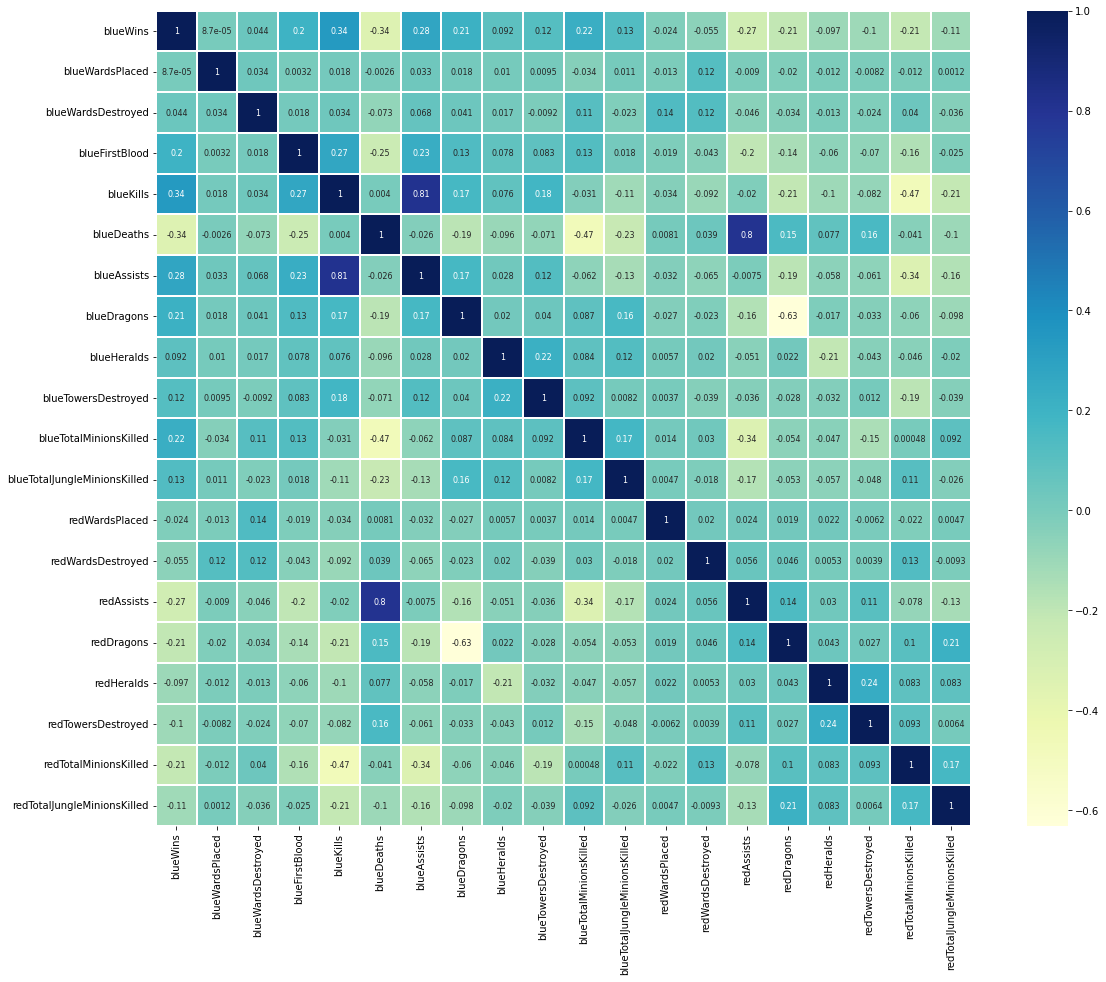

In [ ]:
plt.figure(figsize = (20,15))

sns.heatmap(df_select.corr(),annot = True, vmax=1, square=True, cmap="YlGnBu", 
        linewidths=0.1, annot_kws={"size":8})

# Создание набора функций для оценки продуктивности моделей

Эти функции сделаны для упрощения процесса исследования и избегания постоянного повторения одного и того же кода, поэтому вы можете потом использовать при проведении собственных исследований неизменными или внеся желаемые вам изменения

In [ ]:
# функция оценки модели

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, 
                   figsize=(10,5), params=False): 

        
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    # Classification Report / Scores 

    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("****CLASSIFICATION REPORT - TEST DATA****")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")

    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=figsize)
    
    # Confusion Matrix
    metrics.ConfusionMatrixDisplay.from_estimator(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    # Plot ROC Curve
    metrics.RocCurveDisplay.from_estimator(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)
        
    
def split_scale(df, target, scaler=StandardScaler()):
   
    
    
    # Separate X and y
    target = target
    y = df[target]
    X = df.drop(target, axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    
    # Get list of column names
    cols = X_train.columns
    
    # Scale columns
    scaler = scaler
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)
    
    return X_train, X_test, y_train, y_test


def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, 
             figsize=(10,5), params=False):

    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, 
                   figsize=figsize, params=params)
    
    return model

In [ ]:
# Create training and test data splits.
X_train_select, X_test_select, y_train_select, \
                y_test_select = split_scale(df_select, 'blueWins')
X_train_big, X_test_big, y_train_big, \
             y_test_big = split_scale(df_big, 'blueWins')

# Сравнение работы модели на наборах данных разной полноты.

Проведём оценку работы модели на выборочном наборе данных

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7182    0.6417    0.6778      4203
           1     0.6756    0.7477    0.7098      4194

    accuracy                         0.6947      8397
   macro avg     0.6969    0.6947    0.6938      8397
weighted avg     0.6969    0.6947    0.6938      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7241    0.6367    0.6776       746
           1     0.6719    0.7541    0.7106       736

    accuracy                         0.6950      1482
   macro avg     0.6980    0.6954    0.6941      1482
weighted avg     0.6982    0.6950    0.6940      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


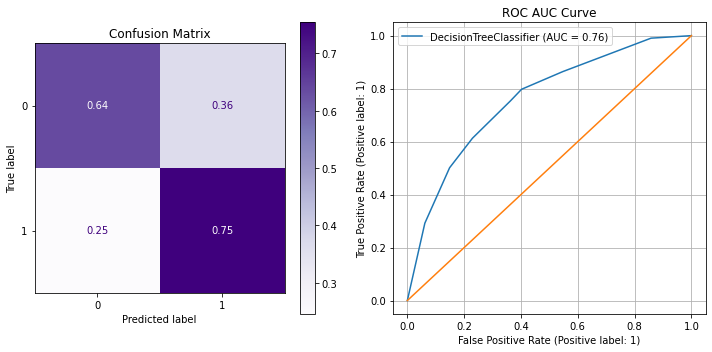

In [ ]:
tree_select = fit_eval(DecisionTreeClassifier(max_depth=3, random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

Теперь посмотрим, что изменилось на полном наборе и убедимся, что продуктивность модели стала лучше.

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7128    0.7583    0.7348      4203
           1     0.7412    0.6938    0.7167      4194

    accuracy                         0.7261      8397
   macro avg     0.7270    0.7261    0.7258      8397
weighted avg     0.7270    0.7261    0.7258      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7054    0.7641    0.7336       746
           1     0.7389    0.6766    0.7064       736

    accuracy                         0.7206      1482
   macro avg     0.7222    0.7204    0.7200      1482
weighted avg     0.7220    0.7206    0.7201      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


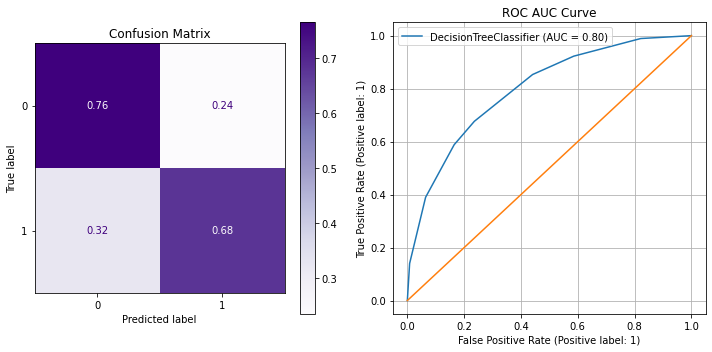

In [ ]:
# применим алгоритм на полном наборе данных 
tree_big=fit_eval(DecisionTreeClassifier(max_depth=3, random_state=42), X_train_big, y_train_big, \
                                                  X_test_big, y_test_big)

# Визуализация

Теперь визуализируем работу нашей модели и посмотрим на процесс принятия решений согласно модели.

In [ ]:
import io
import graphviz
from sklearn import  tree
import pydotplus
import matplotlib.image as mpimg

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


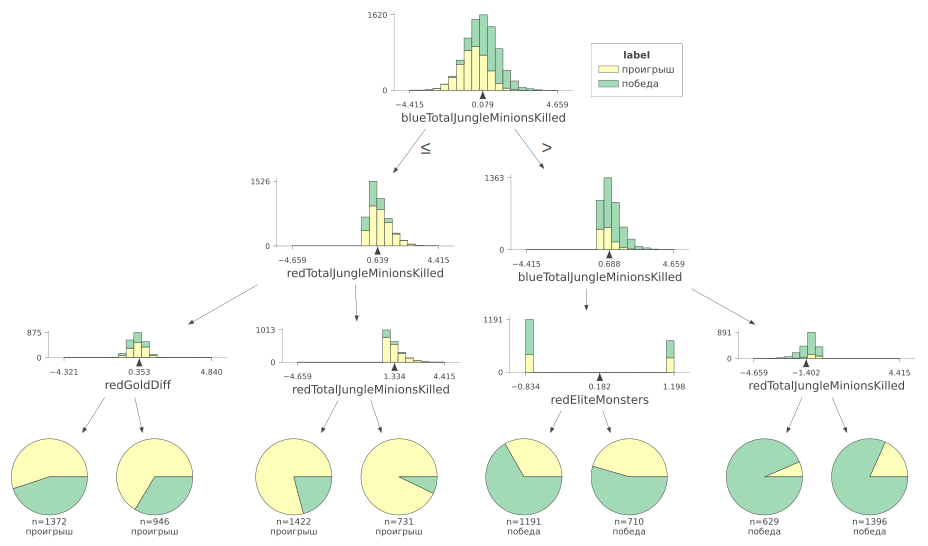

In [ ]:
viz = dtreeviz.model(tree_big, 
              X_train_big,  
              y_train_big,
               target_name='label',
               feature_names=df.columns.to_list(), 
               class_names=["проигрыш", "победа"],
               )

#viz.save("dtreeviz.svg")

viz.view(scale=1.3)

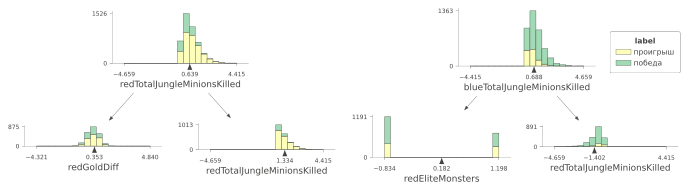

In [ ]:
viz.view(depth_range_to_display=(1, 2)) # root is level 0

Посмотрим процесс принятия решений на конкретном значении из нашего набора данных

In [ ]:
x=df_big.iloc[400]

In [ ]:
df_select.iloc[400]

blueWins                          1
blueWardsPlaced                  17
blueWardsDestroyed                3
blueFirstBlood                    0
blueKills                        10
blueDeaths                       10
blueAssists                      10
blueDragons                       0
blueHeralds                       0
blueTowersDestroyed               0
blueTotalMinionsKilled          219
blueTotalJungleMinionsKilled     38
redWardsPlaced                   13
redWardsDestroyed                 1
redAssists                       10
redDragons                        0
redHeralds                        1
redTowersDestroyed                1
redTotalMinionsKilled           208
redTotalJungleMinionsKilled      31
Name: 400, dtype: int64

Визуализация на полной схеме

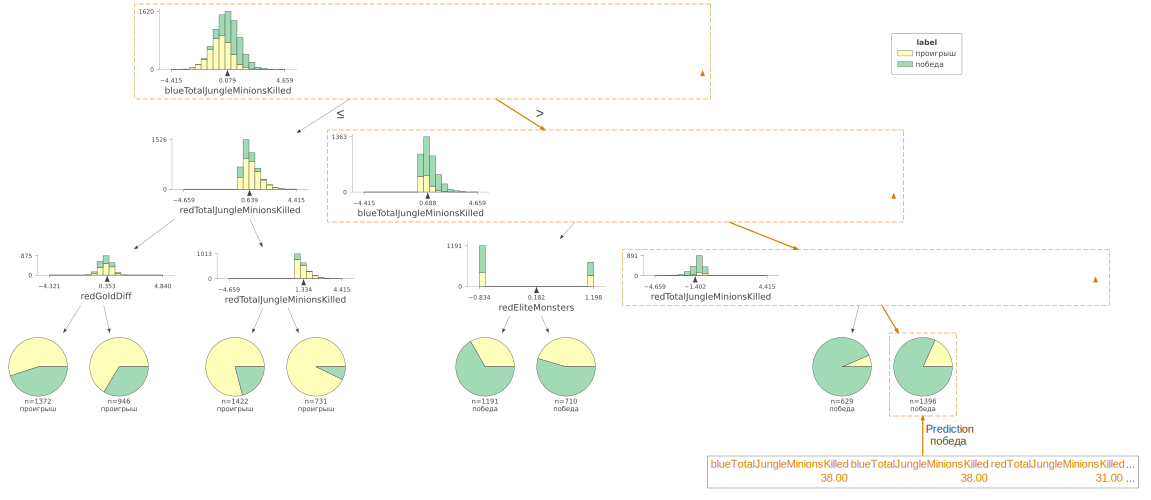

In [ ]:
viz.view(x=x)

Выборочная визуализация только пути принятия решения

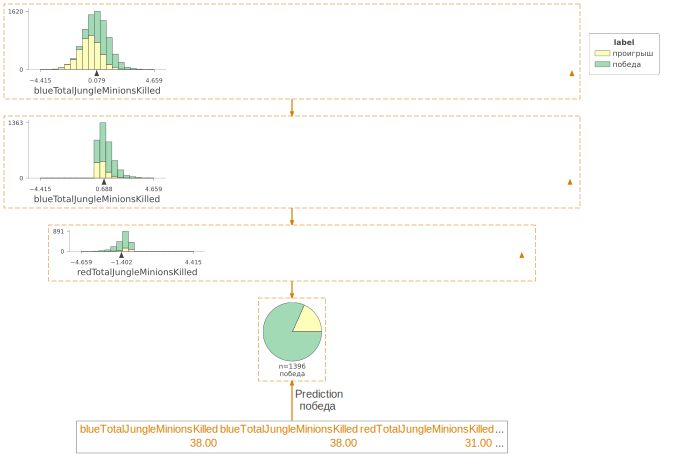

In [ ]:
viz.view(x=x, show_just_path=True)

Текстовое объяснение прогноза для выбранной строки

In [ ]:
print(viz.explain_prediction_path(x))

0.69 <= blueTotalJungleMinionsKilled 
-1.4 <= redTotalJungleMinionsKilled 



Наиболее значимые для принятия решений листья нашей модели

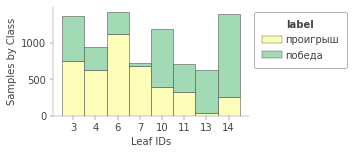

In [ ]:
viz.ctree_leaf_distributions(figsize=(3.5,2))

Визуализируем вклад отдельных признаков в принятие решения

<AxesSubplot:>

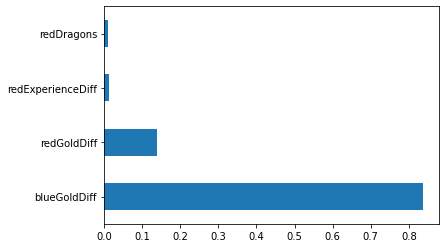

In [ ]:
feat_importances = pd.Series(tree_big.feature_importances_, index=df1.columns)
feat_importances.nlargest(4).plot(kind='barh')

# Использование энтропийного критерия

Теперь используем  информационный критерий как  меру неопределенности по классам в выборке ( энтропийный критерий) для построения модели 

Энтропия Шеннона определяется для системы с 
 возможными состояниями следующим образом:
$$\Large S = -\sum_{i=1}^{N}p_ilog_2p_i,$$
 
где 
$p_i$ – вероятности нахождения системы в 
$i$-ом состоянии. Это очень важное понятие, используемое в физике, теории информации и других областях. Интуитивно, энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот.

In [ ]:
classifier = DecisionTreeClassifier(class_weight=None, 
                                         criterion='entropy', 
                                         max_depth=3,
                                         max_features='sqrt', 
                                         splitter='best', 
                                         random_state= 42)
classifier.fit(X_train_big, y_train_big).score(X_test_big, y_test_big)



0.7206477732793523

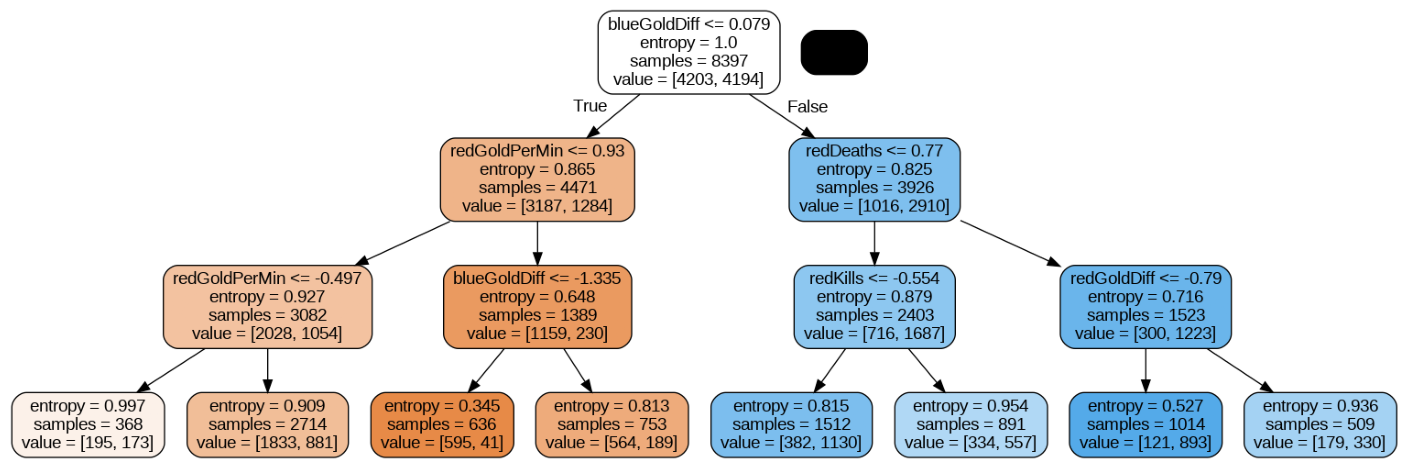

In [ ]:
dot_data = io.StringIO()
tree.export_graphviz(classifier, out_file=dot_data, 
                     feature_names=df1.columns.to_list(),  
                     filled=True,
                     #class_names=['red', 'blue'],
                     rounded=True)

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(25,10))
plt.box(False)

img = mpimg.imread(filename)
fig = plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

plt.show()

# Задание
на собранном ранее наборе данных (он может быть дополнен или собран новый)

- определить цель исследования
- разделить набор данных на тренировочный и тестовый 
- использовать классификацию методом рещающего дерева
- описать ход исследования дав пояснение и обоснование
- сделать выводы и определить практическое значение полученных знаний